In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/tomato/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/datasets/tomato/val'
test_dir="/content/drive/MyDrive/Colab Notebooks/datasets/tomato/test"

In [3]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size= (256, 256),
    batch_size=32
)

validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=42,
    image_size= (256, 256),
    batch_size=32
)

test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size= (256, 256),
    batch_size=32
)

Found 10519 files belonging to 10 classes.
Found 1100 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


Text(0, 0.5, 'Number of Traingn images')

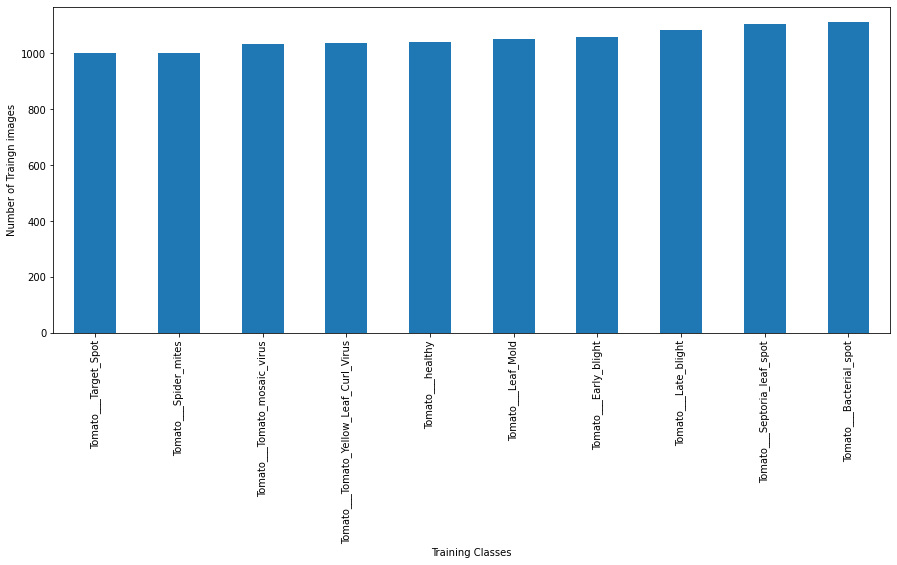

In [4]:
import pandas as pd

# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(train_dir):
    data_dic[folder] = len(os.listdir(train_dir + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

# mengambil input bentuk, bobot, dan bias dari imagenet dan menyertakan cara False teratas
# dan menambahkan lapisan input, meratakan dan output sendiri
vgg16 = VGG16(input_shape = (256, 256, 3), weights = "imagenet", include_top = False)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
for layer in vgg16.layers:
  layer.trainable = False

In [7]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)
# sekarang  tambahkan lapisan keluaran atau lapisan prediksi
prediction = layers.Dense(units = 10, activation="softmax")(x)

# membuat object
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

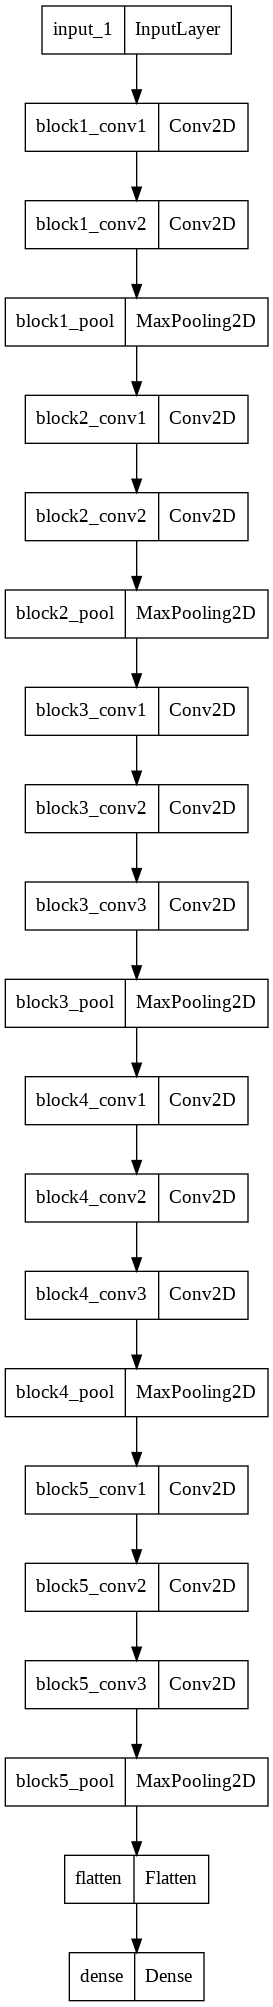

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)
plot_model(model)

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [10]:
class Reminder(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.95
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
            print("\nTarget reached %2.2f%%. Stop Training" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

reminderCB = Reminder()

#checkpoint_filepath = 'model/adams_weights.{epoch:02d}-{val_loss:.3f}.h5'
#checkpointCB = tf.keras.callbacks.ModelCheckpoint(
#                  filepath=checkpoint_filepath,
#                    monitor='val_accuracy',
#                    mode='max',
#                    save_best_only=True)'''

In [11]:
fitting_history = model.fit(
                      train_set,
                      epochs=20,
                      validation_data=validation_set, 
                      verbose=1,
                      callbacks = [reminderCB]
                    )

Epoch 1/20
329/329 [==============================] - 1402s 4s/step - loss: 7.6817 - accuracy: 0.7563 - val_loss: 10.4937 - val_accuracy: 0.7700
Epoch 2/20
329/329 [==============================] - 76s 231ms/step - loss: 1.8127 - accuracy: 0.9295 - val_loss: 12.8530 - val_accuracy: 0.7882
Epoch 3/20
329/329 [==============================] - ETA: 0s - loss: 1.1257 - accuracy: 0.9578
Target reached 95.00%. Stop Training
329/329 [==============================] - 76s 229ms/step - loss: 1.1257 - accuracy: 0.9578 - val_loss: 14.8042 - val_accuracy: 0.7964


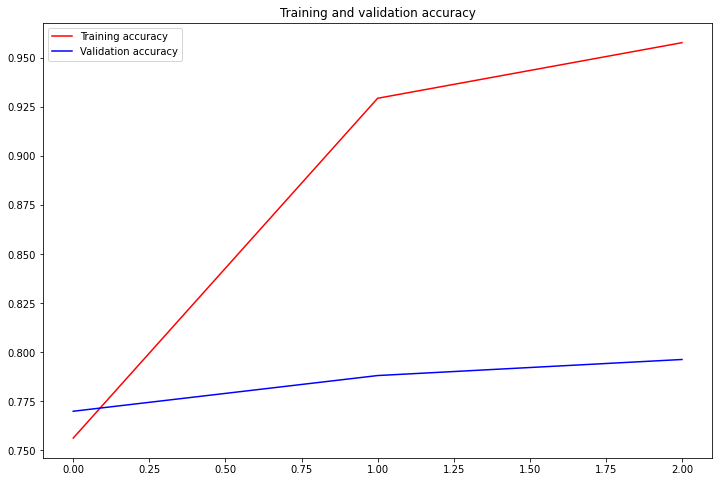

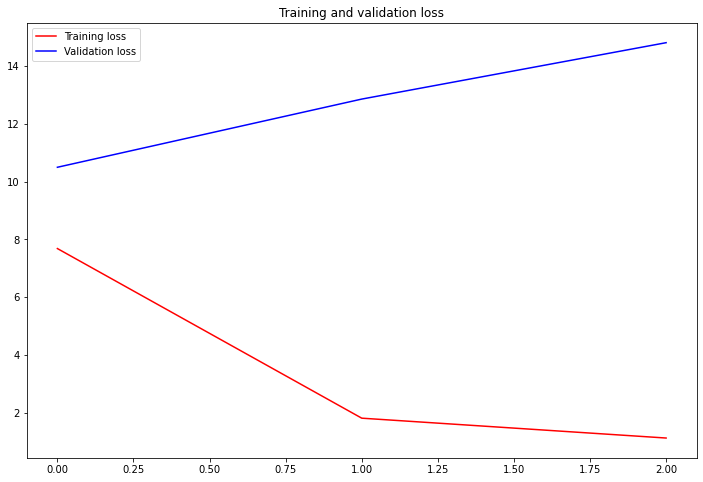

In [16]:
import matplotlib.pyplot as plt

accur = fitting_history.history['accuracy']
val_accur = fitting_history.history['val_accuracy'] 
loss = fitting_history.history['loss']
val_loss = fitting_history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

epochs = range(len(loss))

plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

Saving 0a68a294-30d1-4422-ab7e-a1909ec277f7___JR_Sept.L.S 8443.JPG to 0a68a294-30d1-4422-ab7e-a1909ec277f7___JR_Sept.L.S 8443.JPG
4
Tomato___Septoria_leaf_spot


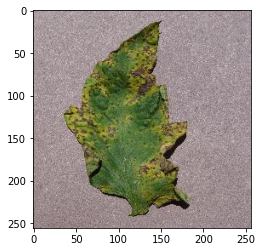

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(256,256))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(output_class)
  if output_class==0:
    print('Tomato___Bacterial_spot')
  elif output_class==1:
    print('Tomato___Early_blight')
  elif output_class==2:
    print('Tomato___Late_blight')
  elif output_class==3:
    print('Tomato___Leaf_Mold')
  elif output_class==4:
    print('Tomato___Septoria_leaf_spot')
  elif output_class==5:
    print('Tomato___Spider_mites')
  elif output_class==6:
    print('Tomato___Target_Spot')
  elif output_class==7:
    print('Tomato___Tomato_Yellow_Leaf_Curl_Virus')
  elif output_class==8:
    print('Tomato___Tomato_mosaic_virus')
  elif output_class==9:
    print('Tomato___healthy')

In [14]:
acc = model.evaluate(test_set, verbose=1)

7/7 [==============================] - 19s 361ms/step - loss: 4.3687 - accuracy: 0.8750


In [15]:
model.save('model_vgg16_baru.h5')